In [2]:
# Data Handling
import pandas as pd
import numpy as np
#  Visualization
import seaborn as sns
import matplotlib.pyplot as plt
# Preprocessing (encoding, scaling)
from sklearn.preprocessing import StandardScaler
# Utilities
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('yellow_tripdata_2016-03_cleaned.csv')

In [4]:
df

,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,fare_amount,total_amount,pickup_date,pickup_time,dropoff_date,dropoff_time
0,2.50,-73.976746,40.765152,-74.004265,40.746128,9.0,12.35,2016-03-01,00:00:00,2016-03-01,00:07:55
1,2.90,-73.983482,40.767925,-74.005943,40.733166,11.0,15.35,2016-03-01,00:00:00,2016-03-01,00:11:06
2,19.98,-73.782021,40.644810,-73.974541,40.675770,54.5,63.80,2016-03-01,00:00:00,2016-03-01,00:31:06
3,10.78,-73.863419,40.769814,-73.969650,40.757767,31.5,41.62,2016-03-01,00:00:00,2016-03-01,00:00:00
4,30.43,-73.971741,40.792183,-74.177170,40.695053,98.0,113.80,2016-03-01,00:00:00,2016-03-01,00:00:00
...,...,...,...,...,...,...,...,...,...,...,...
12134013,12.10,-73.789154,40.646736,-73.875351,40.757648,34.5,40.30,2016-03-20,08:59:21,2016-04-18,10:58:05
12134014,0.40,-73.977356,40.774471,-73.982536,40.772408,4.0,7.50,2016-03-26,03:02:32,2016-06-14,18:47:55
12134015,20.20,0.000000,0.000000,-74.008614,40.710987,52.0,64.34,2016-03-20,08:43:59,2016-06-27,15:05:01
12134016,15.40,-73.790077,40.647377,-73.971756,40.578457,42.5,49.30,2016-03-20,08:49:47,2016-06-28,19:11:27


In [5]:
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12134018 entries, 0 to 12134017
Data columns (total 11 columns):
 #   Column             Dtype  
---  ------             -----  
 0   trip_distance      float64
 1   pickup_longitude   float64
 2   pickup_latitude    float64
 3   dropoff_longitude  float64
 4   dropoff_latitude   float64
 5   fare_amount        float64
 6   total_amount       float64
 7   pickup_date        object 
 8   pickup_time        object 
 9   dropoff_date       object 
 10  dropoff_time       object 
dtypes: float64(7), object(4)
memory usage: 1018.3+ MB


In [6]:
# وصف إحصائي للأعمدة الرقمية
df.describe().T


,count,mean,std,min,25%,50%,75%,max
trip_distance,12134018.0,2.968991,3.614031,0.010000,1.000000,1.700000,3.200000,87.180000
pickup_longitude,12134018.0,-72.939537,8.685895,-161.698669,-73.991760,-73.981651,-73.966911,0.000000
pickup_latitude,12134018.0,40.181154,4.784938,0.000000,40.736435,40.753311,40.767681,66.856819
dropoff_longitude,12134018.0,-73.057835,8.179715,-161.698669,-73.991272,-73.979660,-73.962486,0.000000
dropoff_latitude,12134018.0,40.247275,4.506202,0.000000,40.734802,40.753841,40.769157,50.797863
fare_amount,12134018.0,12.703191,10.543678,0.010000,6.500000,9.500000,14.500000,700.000000
total_amount,12134018.0,15.949538,13.154774,0.310000,8.750000,11.800000,17.760000,1463.120000


In [7]:
# البحث عن البيانات المفقودة
df.isnull().sum()


trip_distance        0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
fare_amount          0
total_amount         0
pickup_date          0
pickup_time          0
dropoff_date         0
dropoff_time         0
dtype: int64

In [8]:
# نسبة البيانات المفقودة
(df.isnull().sum()/len(df)*100).sort_values(ascending=False)


trip_distance        0.0
pickup_longitude     0.0
pickup_latitude      0.0
dropoff_longitude    0.0
dropoff_latitude     0.0
fare_amount          0.0
total_amount         0.0
pickup_date          0.0
pickup_time          0.0
dropoff_date         0.0
dropoff_time         0.0
dtype: float64

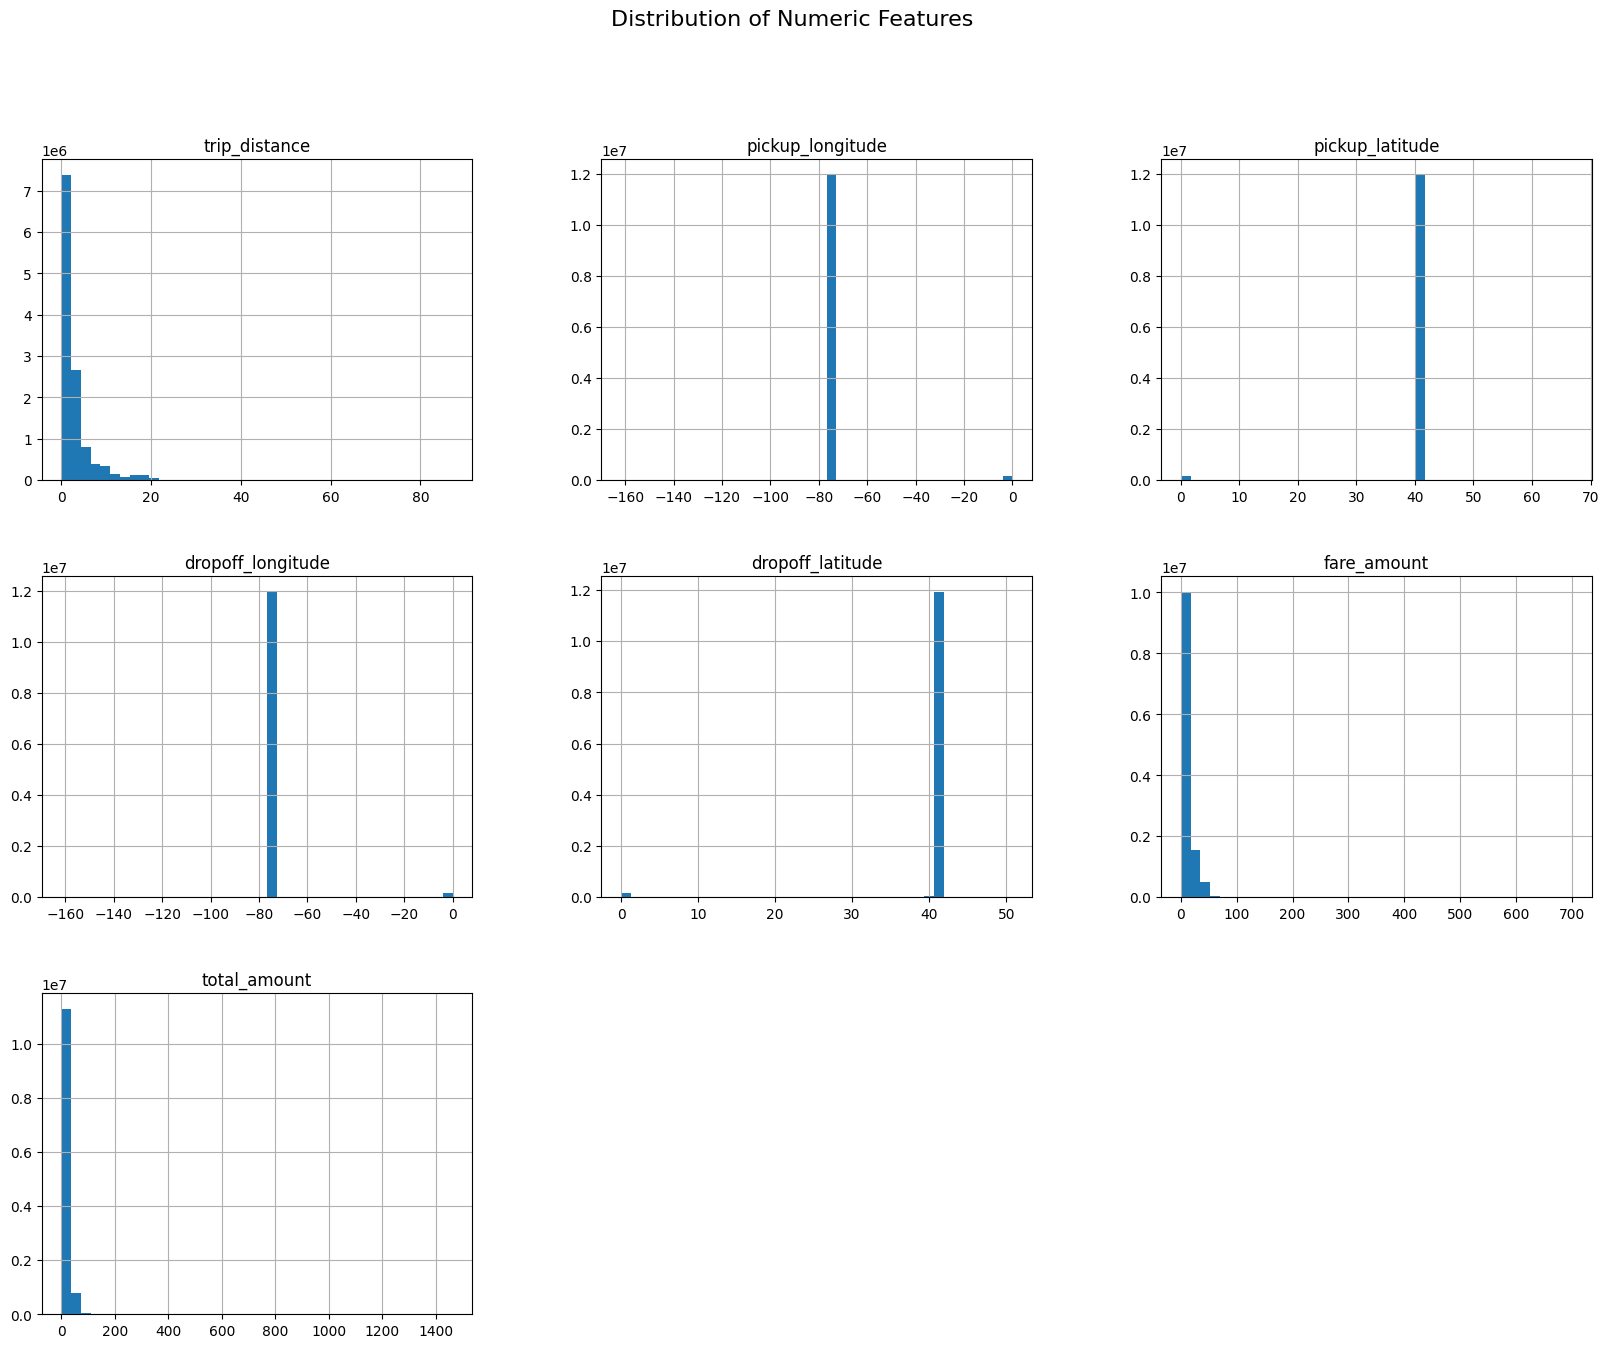

In [9]:
df.hist(figsize=(20, 15), bins=40)
plt.suptitle("Distribution of Numeric Features", fontsize=16)
plt.show()


In [11]:
# دمج التاريخ والوقت في عمود datetime واحد
df['pickup_datetime'] = pd.to_datetime(df['pickup_date'] + ' ' + df['pickup_time'])

# استخراج اليوم (0=Monday, 6=Sunday)
df['weekday'] = df['pickup_datetime'].dt.dayofweek

# أو أسماء الأيام
df['weekday_name'] = df['pickup_datetime'].dt.day_name()

# استخراج الساعة
df['hour'] = df['pickup_datetime'].dt.hour
df['day'] = df['pickup_datetime'].dt.day
# حساب عدد الرحلات لكل يوم ولكل ساعة
hourly_counts = df.groupby(['weekday', 'hour']).size().reset_index(name='trip_count')

print(hourly_counts.head())

   weekday  hour  trip_count
0        0     0       27152
1        0     1       16077
2        0     2       10283
3        0     3        7435
4        0     4        8925


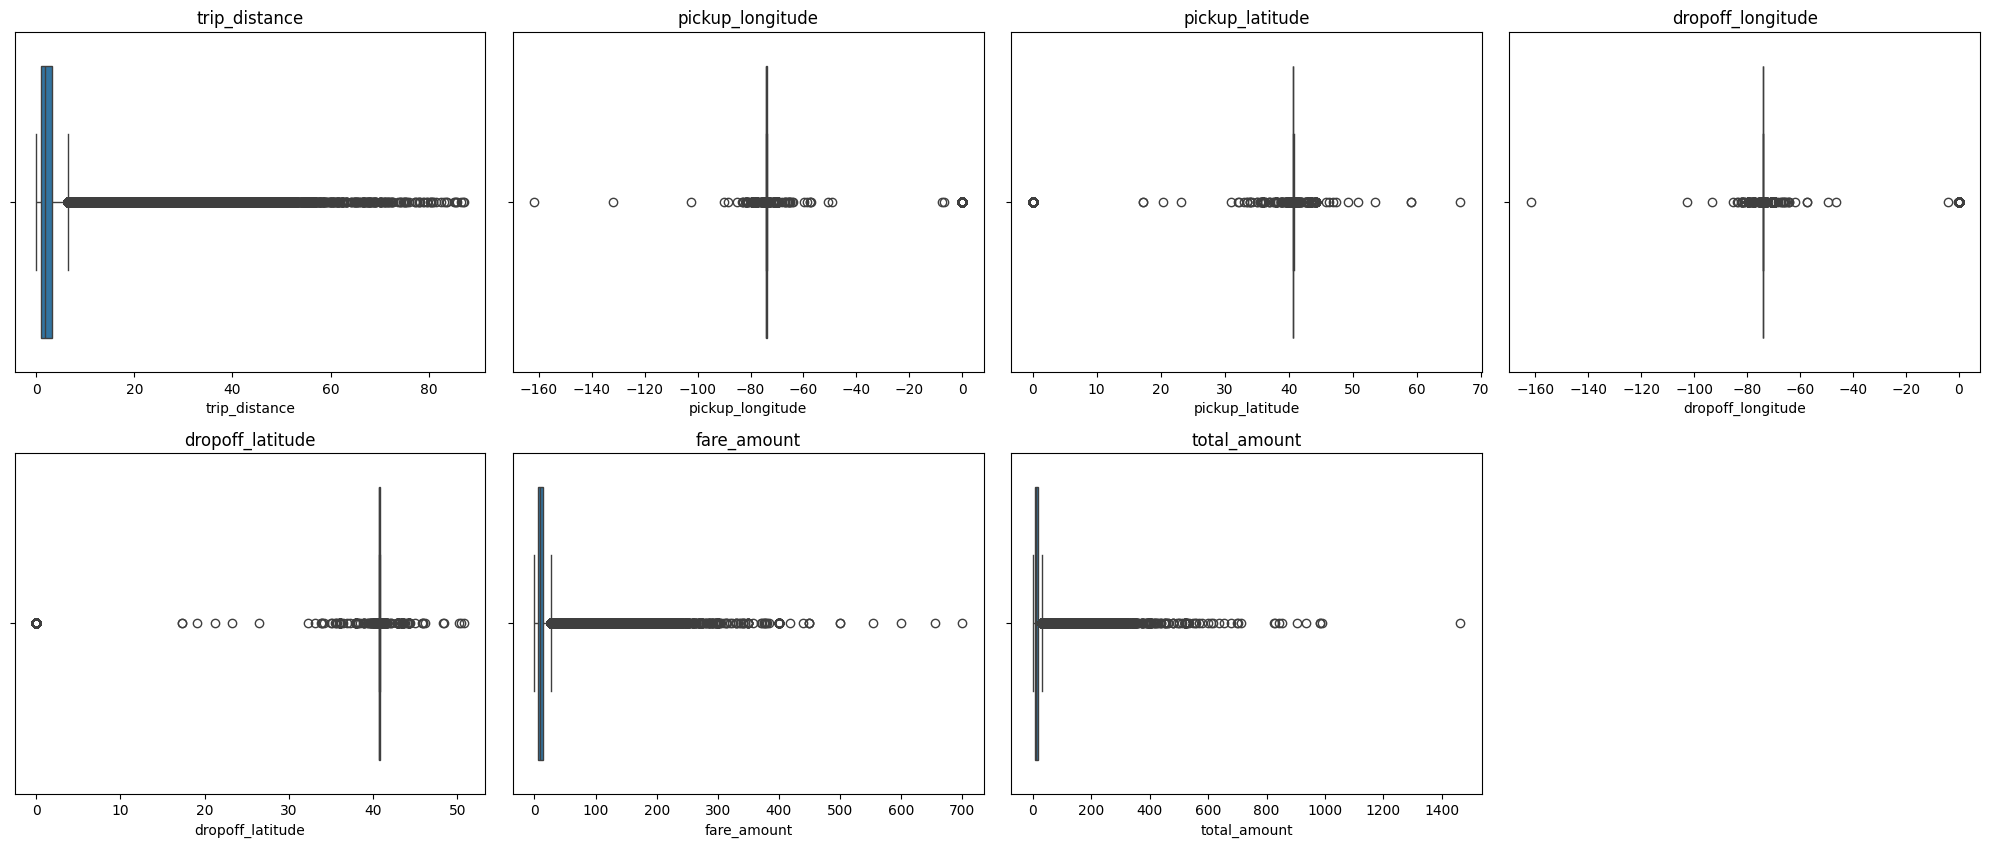

In [12]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(20, 25))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(6, 4, i)
    sns.boxplot(x=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()


In [13]:
def remove_outliers(df):
    a = df.shape[0]
    print("Total original rows:", a)

    # 1) مدة الرحلة
    if 'duration_min' not in df.columns:
        print("duration_min not found - computing it...")
        df['pickup_datetime'] = pd.to_datetime(df['pickup_date'] + ' ' + df['pickup_time'])
        df['dropoff_datetime'] = pd.to_datetime(df['dropoff_date'] + ' ' + df['dropoff_time'])
        df['duration_min'] = (df['dropoff_datetime'] - df['pickup_datetime']).dt.total_seconds() / 60.0

    before = df.shape[0]
    df = df[(df['duration_min'] > 1) & (df['duration_min'] < 720)]
    after = df.shape[0]
    print("Duration outliers removed:", before - after)

    # 3) مسافة الرحلة
    before = df.shape[0]
    df = df[(df['trip_distance'] > 1) & (df['trip_distance'] < 23)]
    after = df.shape[0]
    print("Distance outliers removed:", before - after)

    # 4) السرعة
    if 'Speed' not in df.columns:
        df['Speed'] = df['trip_distance'] / (df['duration_min'] / 60.0)

    before = df.shape[0]
    df = df[(df['Speed'] >= 0.5) & (df['Speed'] <= 80)]
    after = df.shape[0]
    print("Speed outliers removed:", before - after)

    # 5) السعر
    before = df.shape[0]
    df = df[(df['total_amount'] > 1) & (df['total_amount'] < 200)]
    after = df.shape[0]
    print("Fare outliers removed:", before - after)

    print("\nTotal outliers removed overall:", a - df.shape[0])
    return df


# تنظيف df الأصلية
df = remove_outliers(df)
print("After cleaning shape:", df.shape)


Total original rows: 12134018
duration_min not found - computing it...
Duration outliers removed: 58143
Distance outliers removed: 3057233
Speed outliers removed: 1232
Fare outliers removed: 277

Total outliers removed overall: 3116885
After cleaning shape: (9017133, 19)


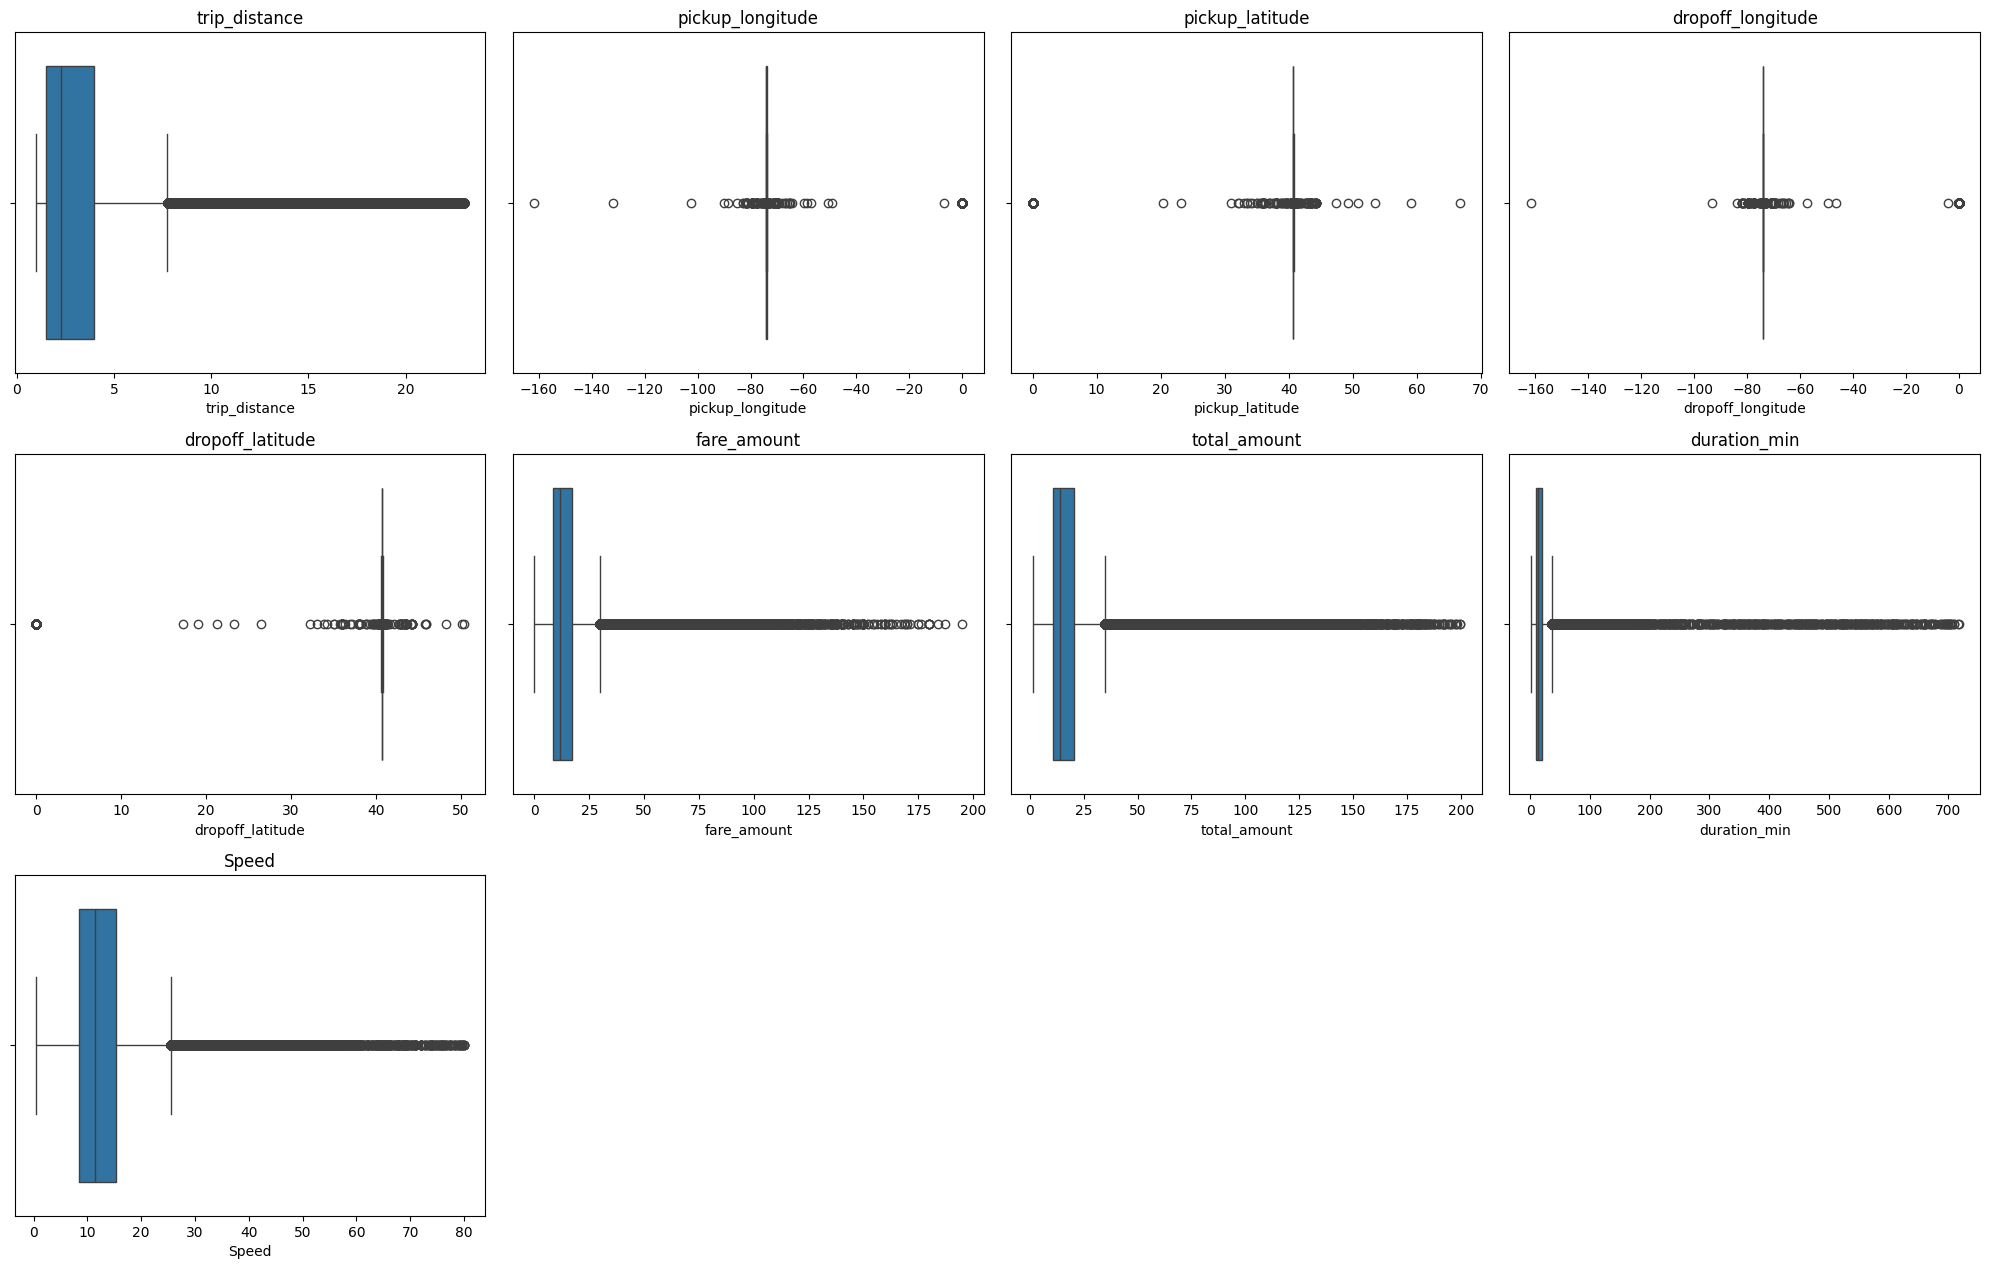

In [14]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(20, 25))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(6, 4, i)
    sns.boxplot(x=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()


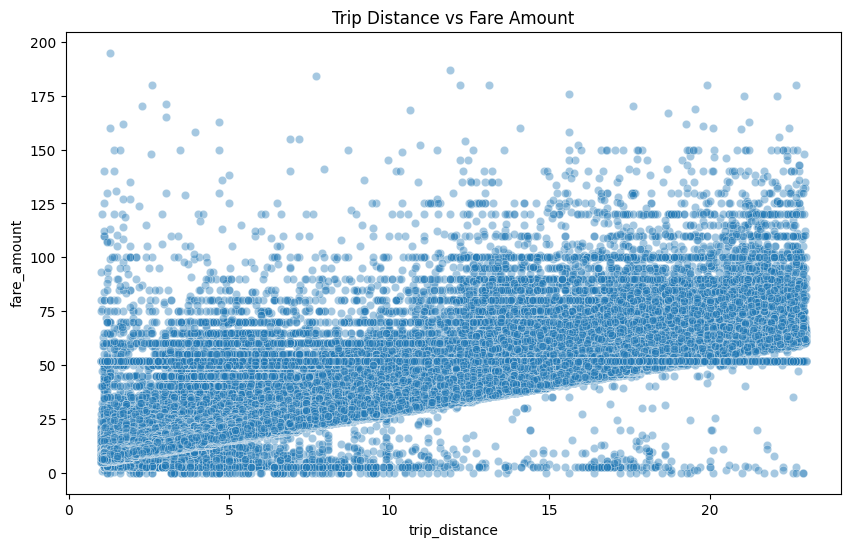

In [15]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='trip_distance', y='fare_amount', alpha=0.4)
plt.title("Trip Distance vs Fare Amount")
plt.show()


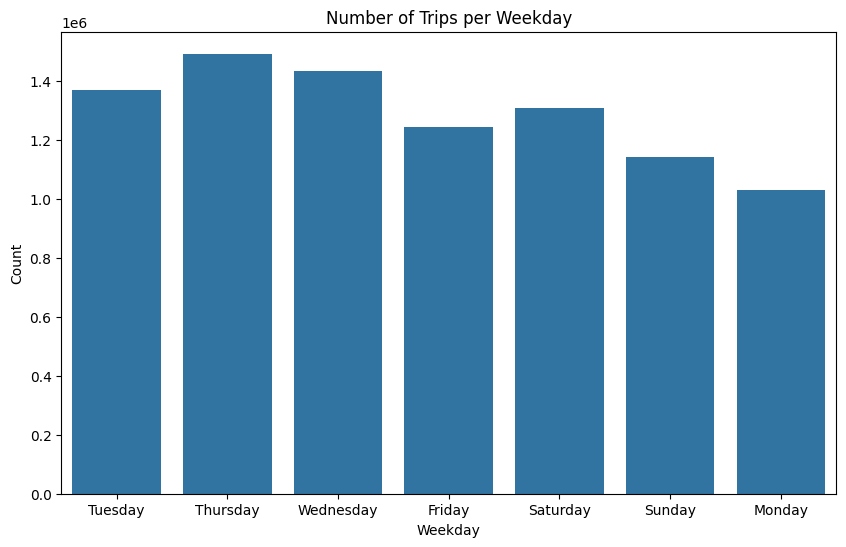

In [16]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x="weekday_name")
plt.title("Number of Trips per Weekday")
plt.xlabel("Weekday")
plt.ylabel("Count")
plt.show()


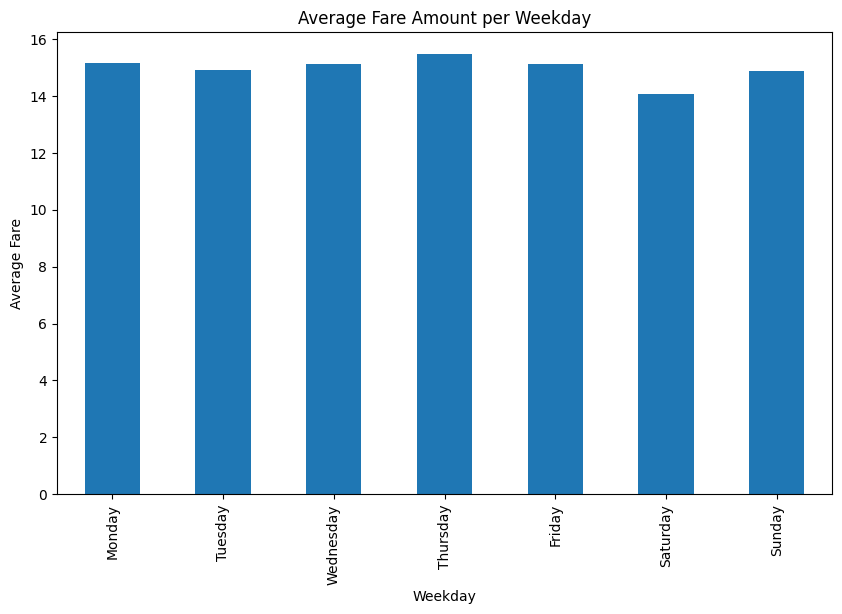

In [17]:

# ترتيب الأيام من الإثنين إلى الأحد
weekday_order = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]

# حساب المتوسط لكل يوم
avg_fare = df.groupby("weekday_name")["fare_amount"].mean().reindex(weekday_order)

# رسم الأعمدة
plt.figure(figsize=(10,6))
avg_fare.plot(kind="bar")
plt.title("Average Fare Amount per Weekday")
plt.xlabel("Weekday")
plt.ylabel("Average Fare")
plt.show()


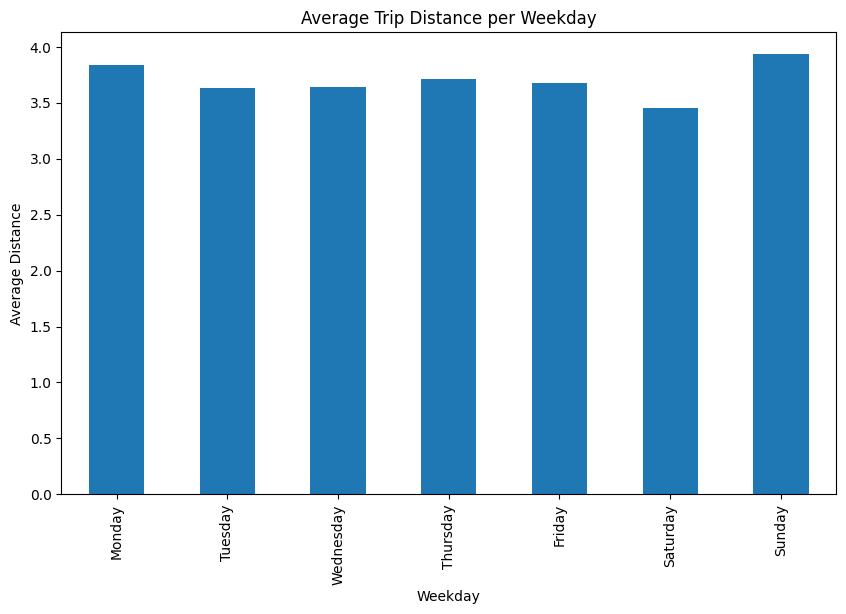

In [18]:
plt.figure(figsize=(10,6))
df.groupby("weekday_name")["trip_distance"].mean().reindex(weekday_order).plot(kind="bar")
plt.title("Average Trip Distance per Weekday")
plt.xlabel("Weekday")
plt.ylabel("Average Distance")
plt.show()


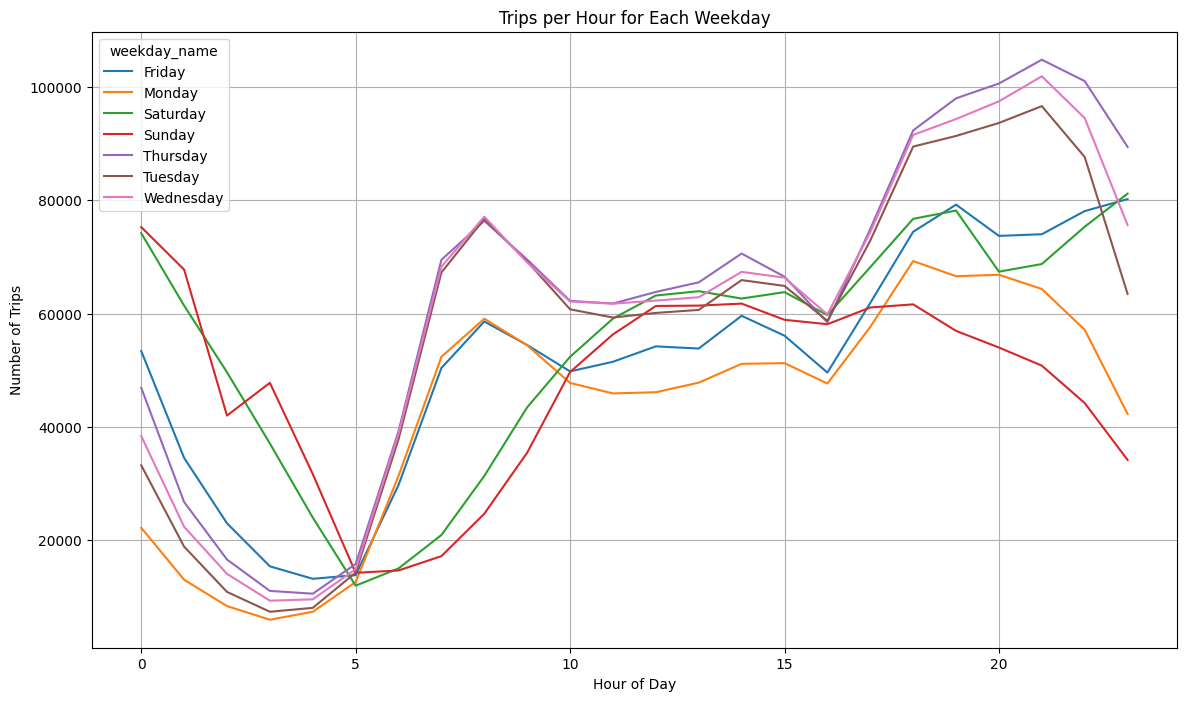

In [19]:
# 1) حساب عدد الرحلات لكل يوم ولكل ساعة
hourly_counts = df.groupby(["weekday_name", "hour"]).size().reset_index(name="trip_count")

# 2) رسم المخطط
plt.figure(figsize=(14,8))
sns.lineplot(data=hourly_counts, x="hour", y="trip_count", hue="weekday_name")
plt.title("Trips per Hour for Each Weekday")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Trips")
plt.grid(True)
plt.show()


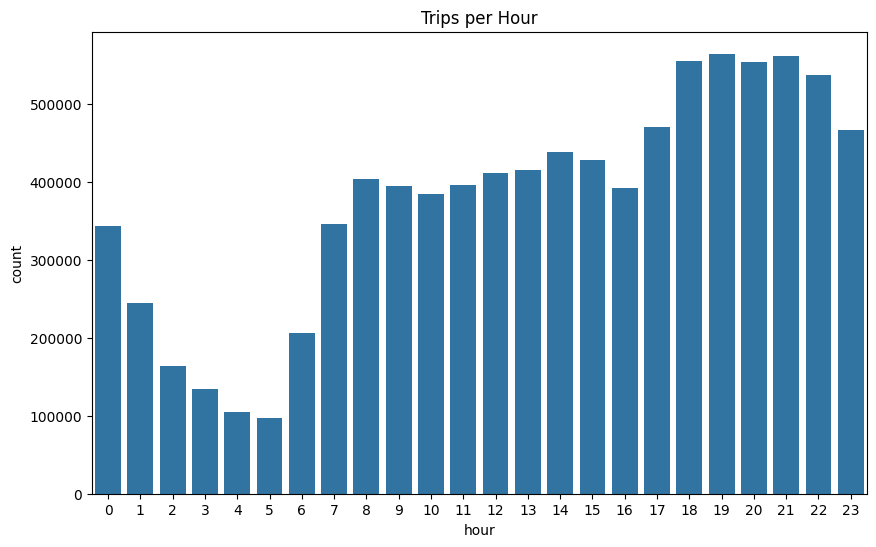

In [20]:
plt.figure(figsize=(10,6))
sns.countplot(x=df['hour'])
plt.title("Trips per Hour")
plt.show()


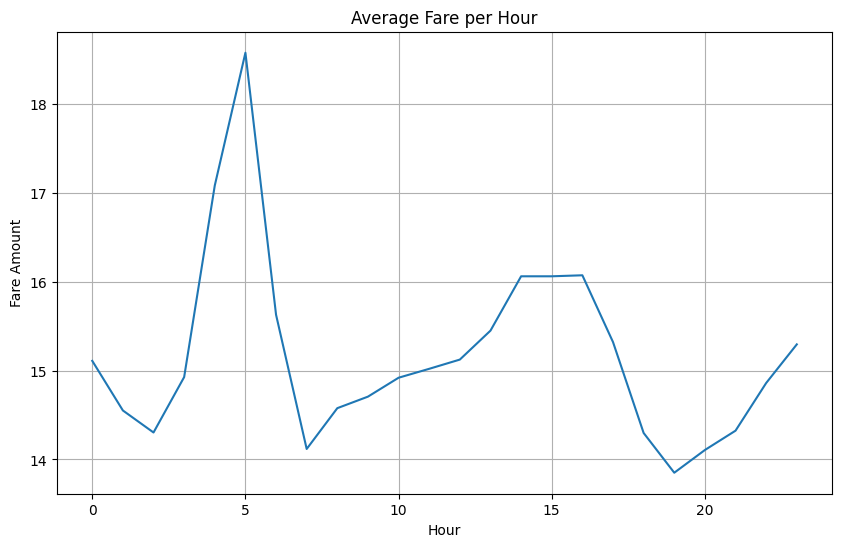

In [21]:
hourly_fare = df.groupby('hour')['fare_amount'].mean()

plt.figure(figsize=(10,6))
hourly_fare.plot(kind='line')
plt.title("Average Fare per Hour")
plt.xlabel("Hour")
plt.ylabel("Fare Amount")
plt.grid()
plt.show()


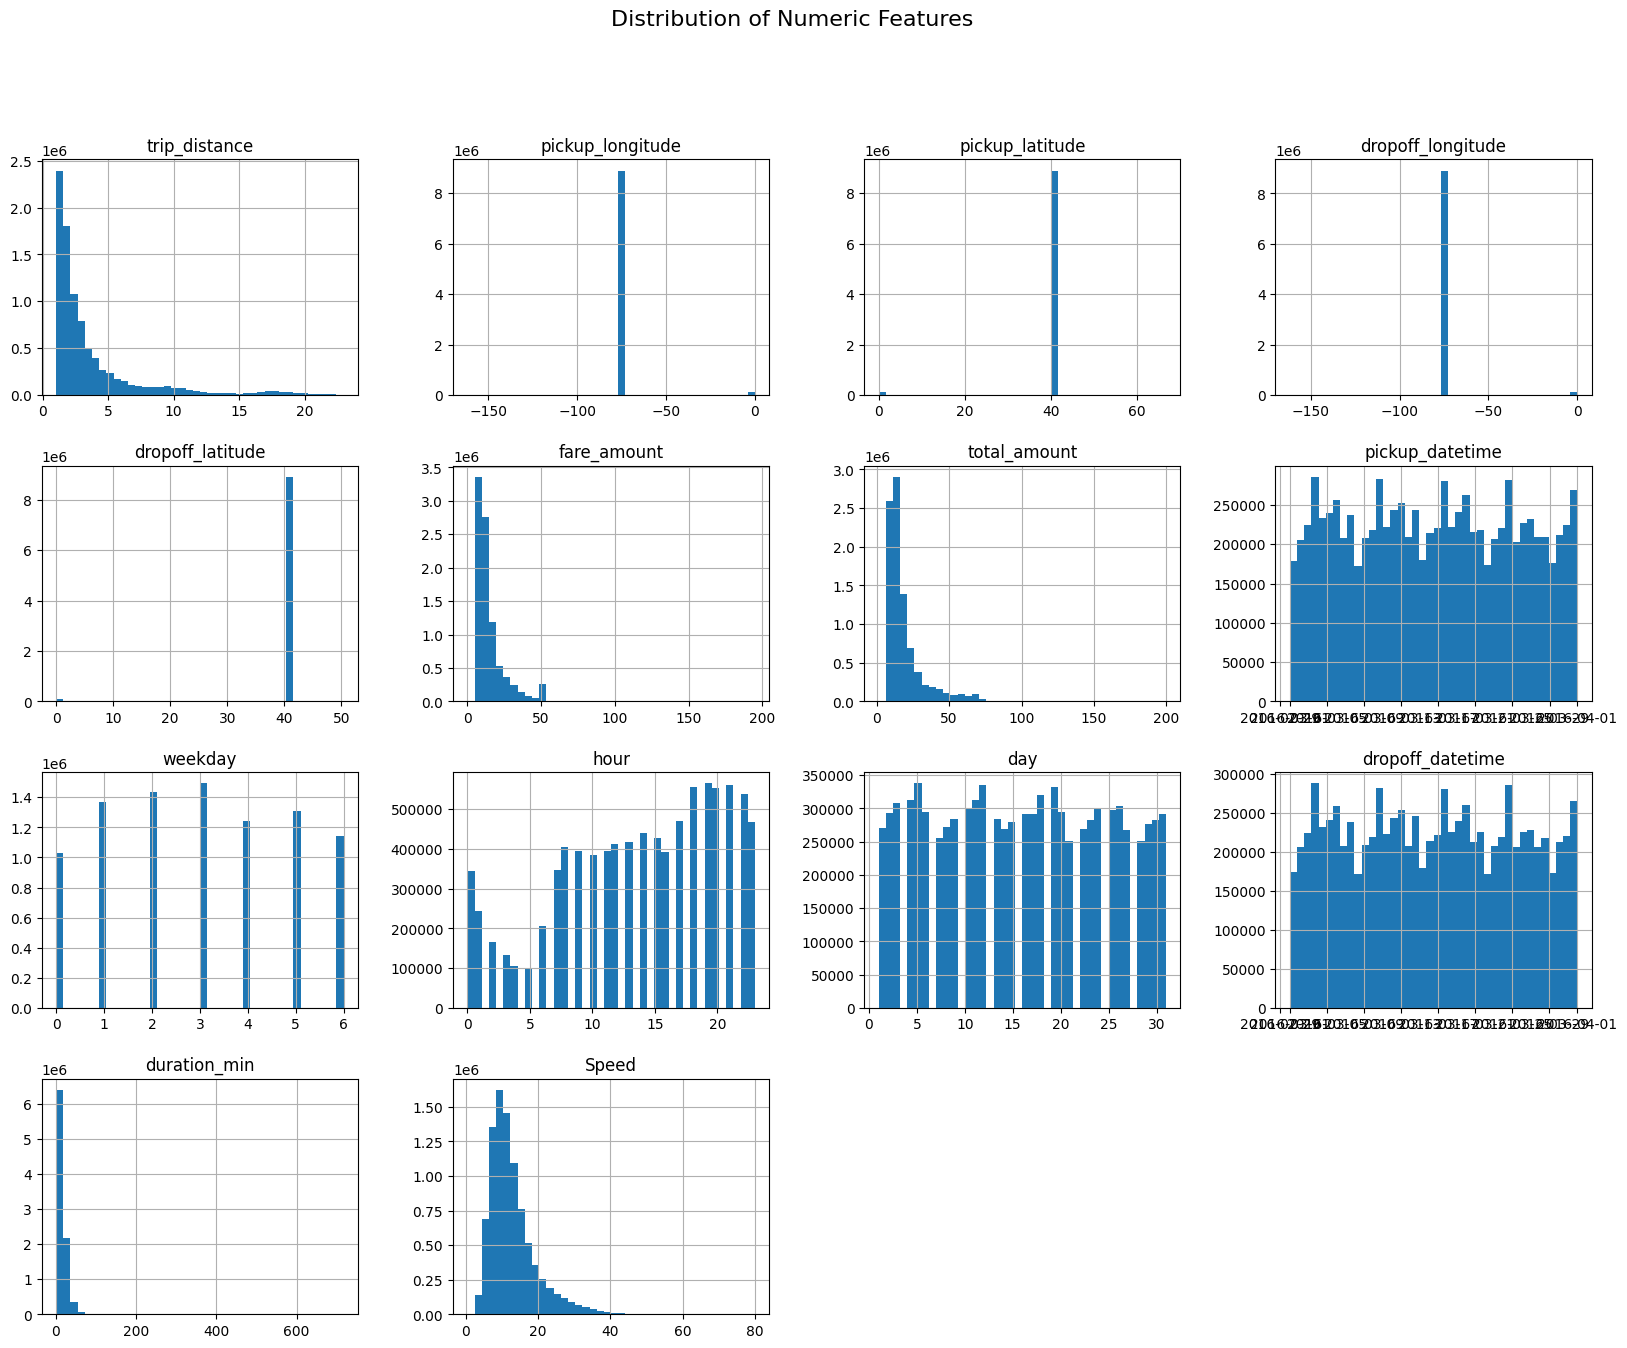

In [22]:
df.hist(figsize=(20, 15), bins=40)
plt.suptitle("Distribution of Numeric Features", fontsize=16)
plt.show()


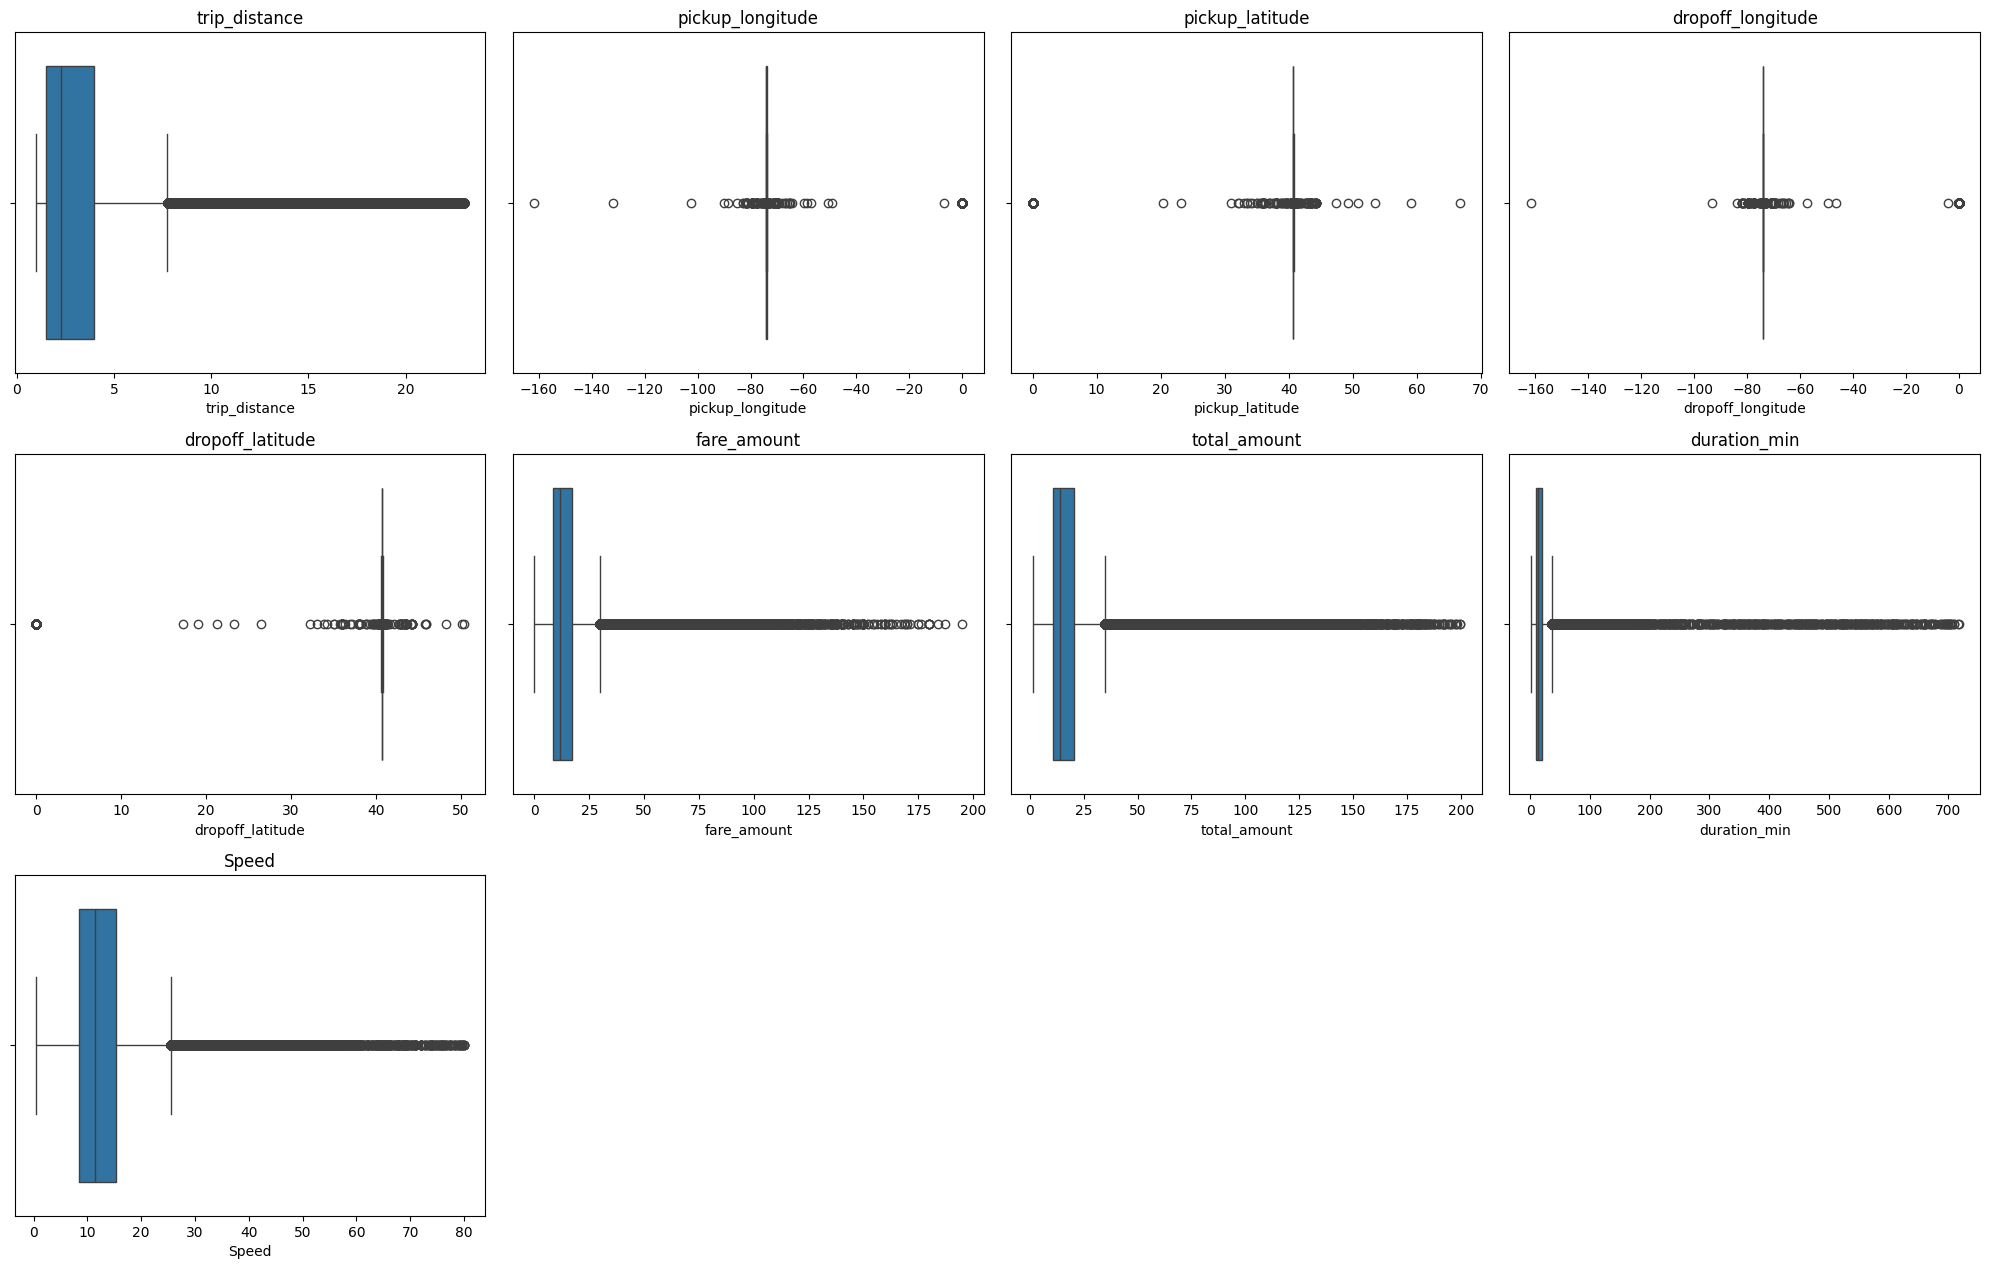

In [23]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(20, 25))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(6, 4, i)
    sns.boxplot(x=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()


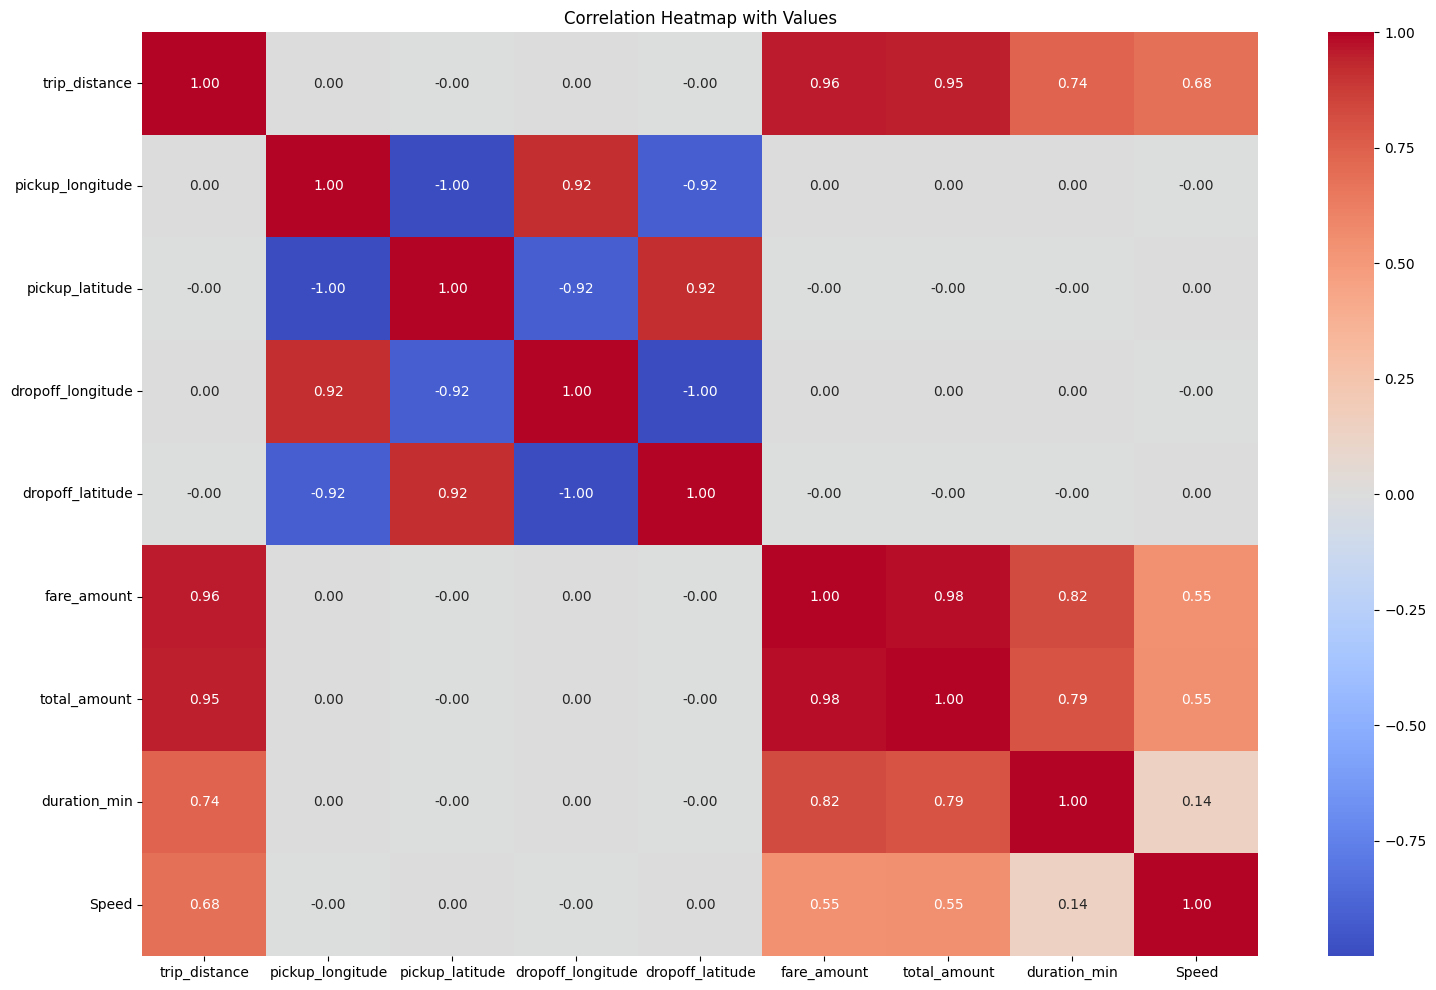

In [24]:
plt.figure(figsize=(18, 12))
sns.heatmap(
    df.select_dtypes(include=['float64', 'int64']).corr(),
    annot=True,          # لإظهار الأرقام
    fmt=".2f",           # تنسيق الرقم إلى منزلتين عشريتين
    cmap="coolwarm",     # ألوان متدرجة (اختياري)
    cbar=True            # إظهار شريط الألوان
)
plt.title("Correlation Heatmap with Values")
plt.show()
